In [1]:
from velocity.velocity_data import rotational_data
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import h5py
import csv
import os
from scipy import stats
import warnings

In [2]:
with h5py.File('galaxy_population_data_'+str(2)+'.hdf5', 'r') as f:
    ids = f['ids'][:]
    median_age = f['median_age'][:]
    halfmass_radius = f['halfmass_radius'][:]
    total_mass = f['total_mass'][:]
    newbin_current_SFR = f['newbin_current_SFR'][:]
    maximum_merger_ratio_30kpc_current_fraction = f['maximum_merger_ratio_30kpc_current_fraction'][:]

Galaxy ID: 	Galaxy Number: 	Average Lambda:


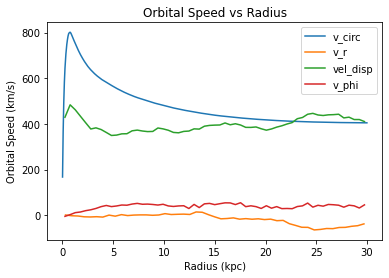

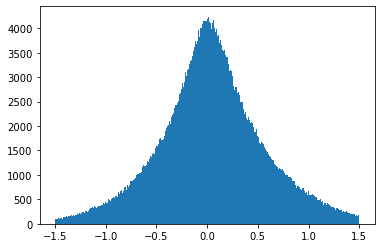

0		0.9290349	0.05264917770363763


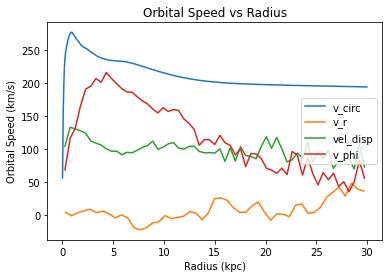

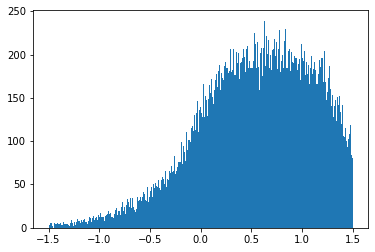

1		0.3167215	0.5855514735466607


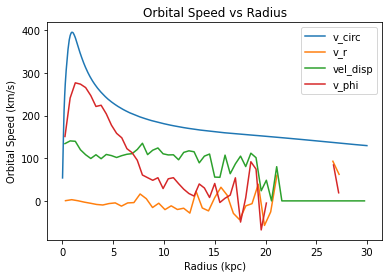

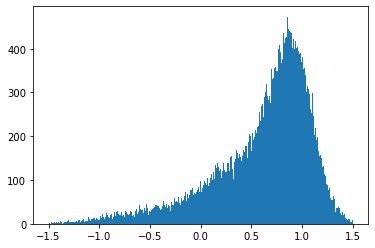

2		0.23659727	0.6084205189646437


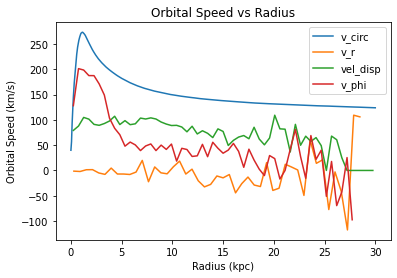

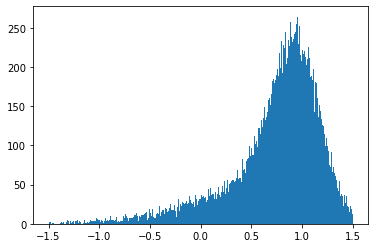

3		0.16458674	0.7466849968488054


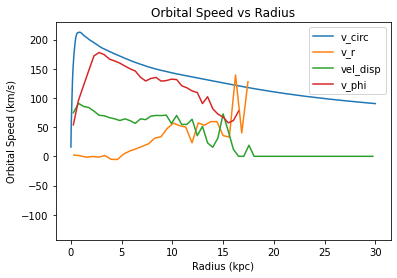

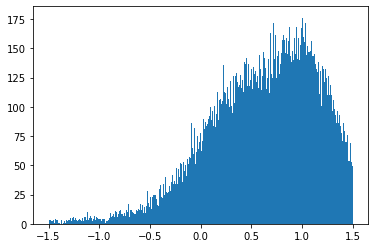

4		0.24859549	0.6610550890258436


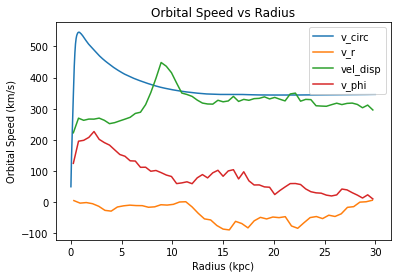

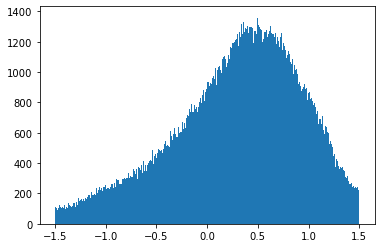

1502		0.59502167	0.3202889841819031


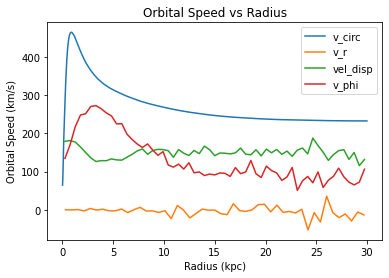

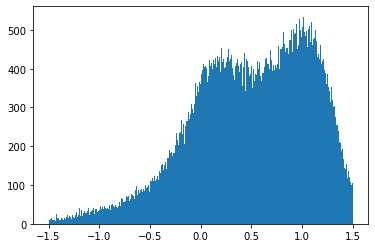

1503		0.39529392	0.5157636849491316


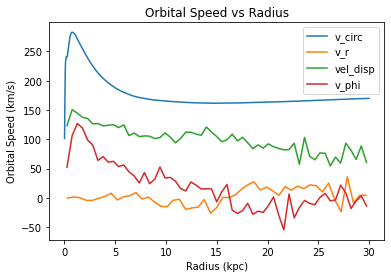

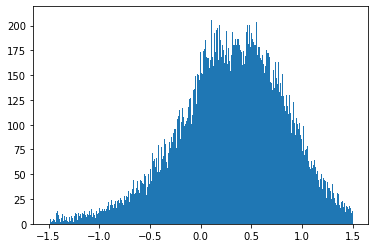

1504		0.52855814	0.3046838325023842


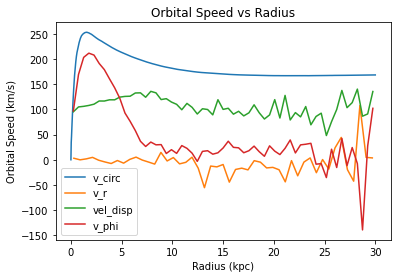

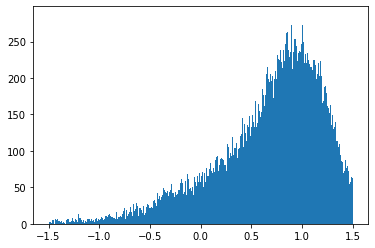

1505		0.24631128	0.7002178784552802


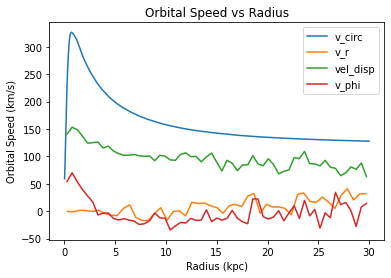

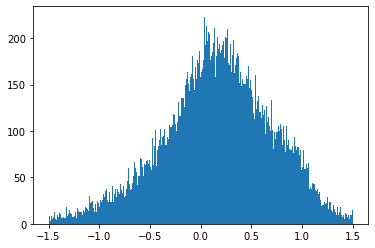

1507		0.71916175	0.1706499302835224


In [3]:
print("Galaxy ID: " + "\tGalaxy Number: " + "\tAverage Lambda:")
with open('galaxy_num.csv', 'w',newline='') as f:
    fieldnames = ['Galaxy ID', 'Galaxy Number','Average Lambda']
    writer = csv.DictWriter(f, fieldnames=fieldnames)
    writer.writeheader()
    for i in range(10):
        id = ids[i]

        r, vel_circ, v_r, r_v_r, e_v, bins, mass_num, vel, radius, v_phi = rotational_data(id,'')

        vel_new,r_new,x = stats.binned_statistic(radius,vel,statistic = 'std',bins = np.linspace(0,30,60))
        r_binned = (r_new[1:]+r_new[:-1])/2
        
        v_phi_new,r_phi_new,x = stats.binned_statistic(radius,v_phi,statistic = 'mean',bins = np.linspace(0,30,60))
        r_phi_binned = (r_phi_new[1:]+r_phi_new[:-1])/2
        
        
        lam = np.mean(e_v)

        plt.plot(r,vel_circ, label = "v_circ")
        plt.plot(r_v_r,v_r, label = "v_r")
        plt.plot(r_binned,vel_new, label = "vel_disp")
        plt.plot(r_phi_binned,v_phi_new, label = "v_phi")

        plt.legend()

        plt.xlabel("Radius (kpc)")
        plt.ylabel("Orbital Speed (km/s)")
        plt.title("Orbital Speed vs Radius")
        
        plt.show()

        plt.hist(e_v,bins=bins)
        plt.show()

        print(str(id) + "\t\t" + str(mass_num) + '\t' + str(lam))
        
        writer.writerow({'Galaxy ID': str(id), 'Galaxy Number': str(mass_num), 'Average Lambda': str(lam)})
       
    f.close()